# Importing Modules

In [34]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specifying Path to Files

In [35]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Setting Number of Classes

In [36]:
NUM_CLASSES = 11

# Dataset Reading

In [37]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [38]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Building Model

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [41]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,191 (4.65 KB)

 Trainable params: 1,191 (4.65 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [43]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training Model

In [44]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0514 - loss: 2.4799
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0521 - loss: 2.4776 - val_accuracy: 0.2113 - val_loss: 2.1952
Epoch 2/1000
25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2127 - loss: 2.2051 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2237 - loss: 2.1886 - val_accuracy: 0.4225 - val_loss: 1.9424
Epoch 3/1000
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 2.0130 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3440 - loss: 1.9962 - val_accuracy: 0.4828 - val_loss: 1.7191
Epoch 4/1000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 1.7899 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [45]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9128 - loss: 0.2880 


In [46]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [47]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[2.9038170e-01 6.9112010e-02 3.1174251e-05 6.9699101e-11 6.6660418e-06
 5.2672544e-07 6.4686217e-05 2.7121171e-02 6.1328208e-01 3.2921467e-14
 8.3006446e-10]
8


# Confusion Matrix

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


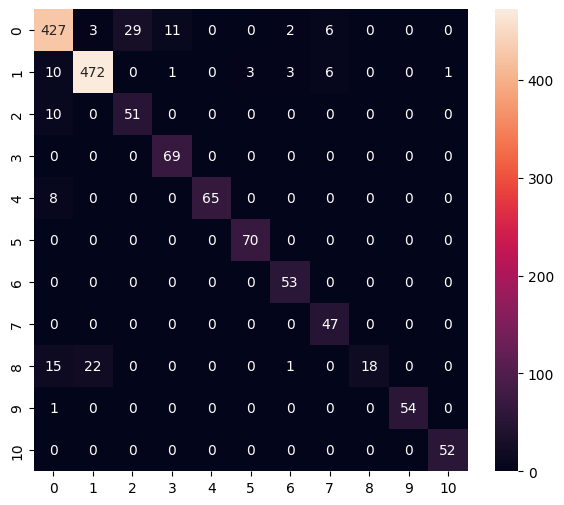

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       478
           1       0.95      0.95      0.95       496
           2       0.64      0.84      0.72        61
           3       0.85      1.00      0.92        69
           4       1.00      0.89      0.94        73
           5       0.96      1.00      0.98        70
           6       0.90      1.00      0.95        53
           7       0.80      1.00      0.89        47
           8       1.00      0.32      0.49        56
           9       1.00      0.98      0.99        55
          10       0.98      1.00      0.99        52

    accuracy                           0.91      1510
   macro avg       0.91      0.90      0.88      1510
weighted avg       0.92      0.91      0.91      1510



In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Converting Model to TensorFlow-Lite

In [49]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [50]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\abdul\AppData\Local\Temp\tmpxx3qzdrx\assets


INFO:tensorflow:Assets written to: C:\Users\abdul\AppData\Local\Temp\tmpxx3qzdrx\assets


Saved artifact at 'C:\Users\abdul\AppData\Local\Temp\tmpxx3qzdrx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  2203773911984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2203781364224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2203781358240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2203781356832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2203781601888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2203781603472: TensorSpec(shape=(), dtype=tf.resource, name=None)


6864

# Inference Test

In [51]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

D:\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [52]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [53]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [54]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [55]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9038170e-01 6.9112010e-02 3.1174251e-05 6.9699101e-11 6.6660418e-06
 5.2672493e-07 6.4686094e-05 2.7121145e-02 6.1328208e-01 3.2921525e-14
 8.3006607e-10]
8
